In [1]:
import numpy as np
from netCDF4 import Dataset
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import cartopy
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load NSIDC regions mask, replace regions we don't use with NaN
nsidc_lat = np.fromfile('/Users/carmennab/Dropbox/OI_PolarSnow/auxiliary/psn25lats_v3.dat',dtype='<i4').reshape(448,304)/100000
nsidc_lon = np.fromfile('/Users/carmennab/Dropbox/OI_PolarSnow/auxiliary/psn25lons_v3.dat',dtype='<i4').reshape(448,304)/100000
file = Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/auxiliary/NSIDC_regions_Mask.nc')
mask = np.array(file['mask']).transpose(1,0).astype('float32')
mask[mask<6]=np.nan
mask[mask>15]=np.nan
mask[mask==14]=np.nan

### plot figure

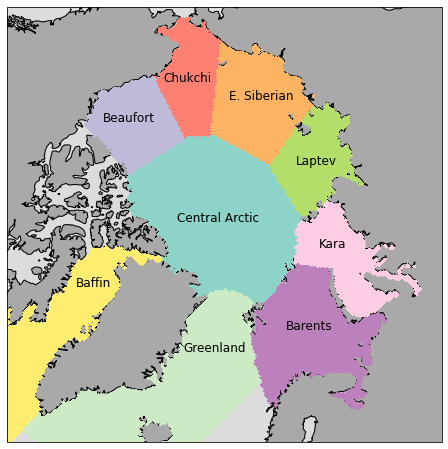

In [3]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax.coastlines()
ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
a = ax.pcolormesh(nsidc_lon,nsidc_lat,mask[:-1,:-1],cmap='Set3_r',transform=ccrs.PlateCarree())

labels = ['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort','Central Arctic']
xs = [0.24,0.55,0.75,0.78,0.76,0.66,0.47,0.34,0.58]
ys = [0.35,0.2,0.25,0.44,0.63,0.78,0.82,0.73,0.5]

for count,label in enumerate(labels):
    plt.annotate(label,xy=(xs[count],ys[count]),va='bottom',ha='right',xycoords='axes fraction',color='k',fontsize=12)
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/supp_figs/regions.png',bbox_inches = "tight", dpi = 400)